## Ej. 2: Plano fases
Sistema:  
$$
\begin{cases}
    x'(t) = 2 - c*x - x + x^2y \\
    y'(t) = c*x - x^2y
\end{cases}
$$

Puntos singulares:
$$
\begin{cases}
    2 - c*x - x + x^2y = 0 \\
    c*x - x^2y = 0
\end{cases}
$$

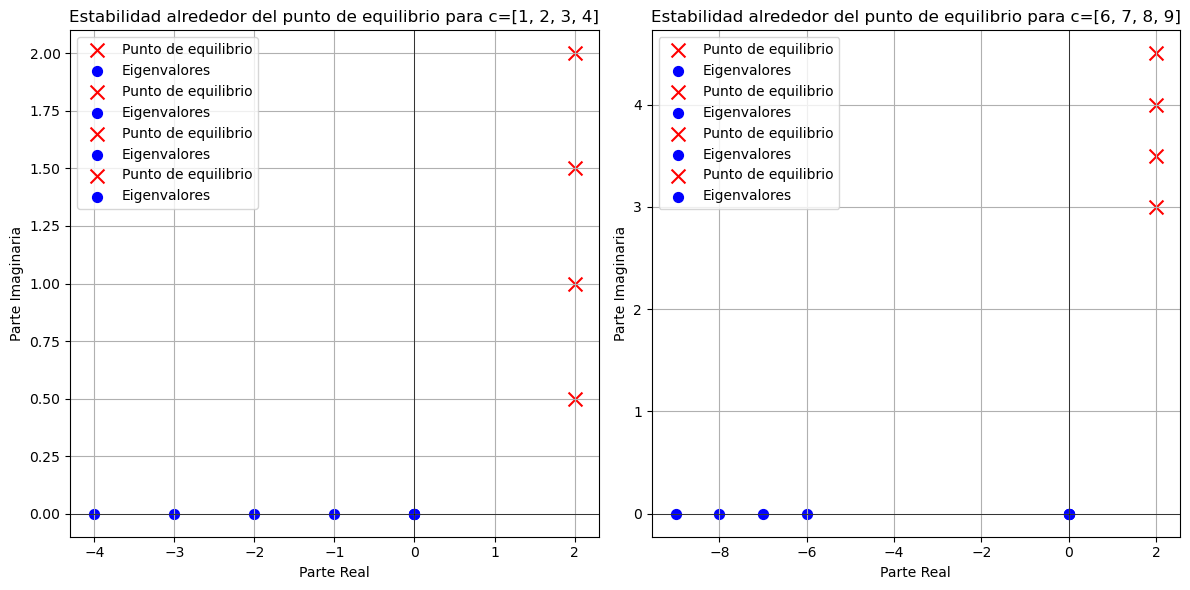

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el sistema de ecuaciones diferenciales
def sistema(y, c):
    x, z = y
    dydt = [2 - c*x - x + x**2*z, c*x - x**2*z]
    return dydt

# Encontrar puntos singulares
def encontrar_puntos_singulares(c):
    x, z = 2, c/2
    return x, z

# Calcular la matriz jacobiana en el punto de equilibrio
def calcular_jacobiano(c):
    x, z = encontrar_puntos_singulares(c)
    J = np.array([
        [-c + 2*x, x**2],
        [c - 2*x, -x**2]
    ])
    return J

# Calcular los eigenvalores de la matriz jacobiana
def calcular_eigenvalores(c):
    J = calcular_jacobiano(c)
    eigenvalores = np.linalg.eigvals(J)
    return eigenvalores

# Valores de c para los dos casos
valores_c1 = [1, 2, 3, 4]
valores_c2 = [6, 7, 8, 9]

# Configuración de la figura
plt.figure(figsize=(12, 6))

# Estudiar el plano de fases alrededor del punto de equilibrio
for i, valores_c in enumerate([valores_c1, valores_c2], 1):
    plt.subplot(1, 2, i)
    
    for c in valores_c:
        # Encontrar puntos singulares
        punto_singular = encontrar_puntos_singulares(c)
        
        # Calcular los eigenvalores
        eigenvalores = calcular_eigenvalores(c)
        
        # Graficar el punto de equilibrio
        plt.scatter(*punto_singular, color='red', marker='x', s=100, label='Punto de equilibrio')

        # Graficar los eigenvalores (indicadores de estabilidad)
        plt.scatter(eigenvalores.real, eigenvalores.imag, color='blue', marker='o', s=50, label='Eigenvalores')

    plt.title(f'Estabilidad alrededor del punto de equilibrio para c={valores_c}')
    plt.xlabel('Parte Real')
    plt.ylabel('Parte Imaginaria')
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()


## Ej: Plano fases
Plano de fases del plano x-y:

$$
\begin{cases}
    x'(t) = -y + x(1-x^2-y^2) \\
    y'(t) = x + y(1-x^2-y^2)
\end{cases}
$$

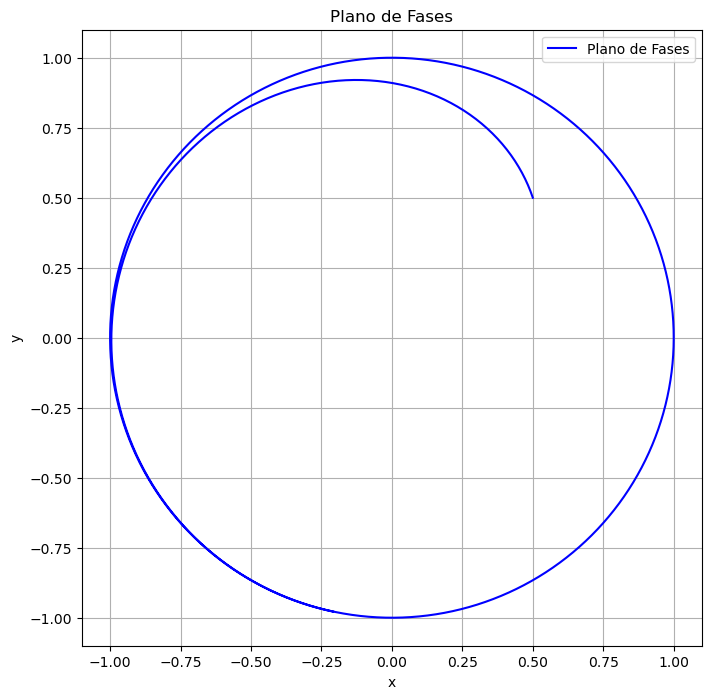

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Definir el sistema de ecuaciones diferenciales
def sistema(y, t, a, b):
    x, z = y
    dydt = [a*z + b*x * (1 - x**2 - z**2), x + z * (1 - x**2 - z**2)]
    return dydt

# Condiciones iniciales
y0 = [0.5, 0.5]

# Crear un conjunto de puntos de tiempo
t = np.linspace(0, 10, 1000)

# Resolver el sistema de ecuaciones diferenciales
sol = odeint(sistema, y0, t)

# Extraer las soluciones para x y y
x, y = sol.T

# Graficar el plano de fases
plt.figure(figsize=(8, 8))
plt.plot(x, y, 'b-', label='Plano de Fases')
plt.title('Plano de Fases')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()


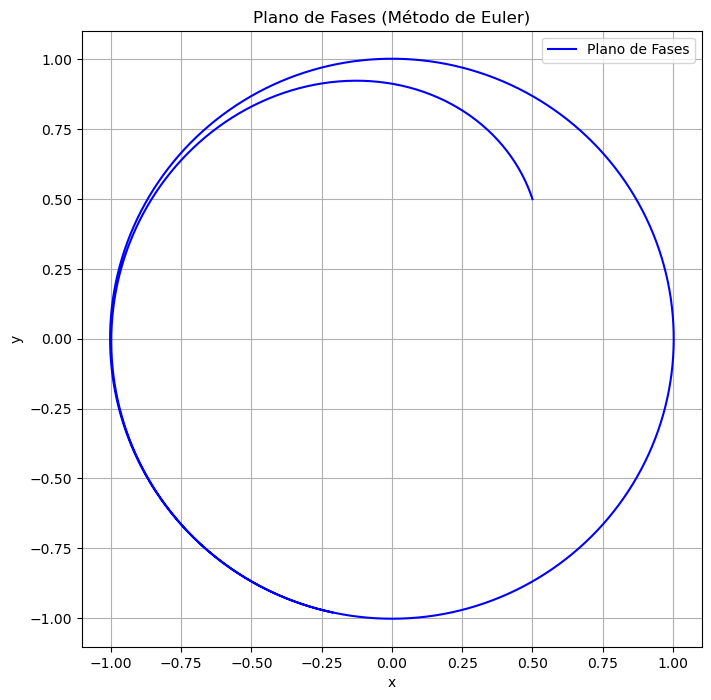

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el sistema de ecuaciones diferenciales
def sistema(t, y):
    x, z = y
    dydt = [-z + x * (1 - x**2 - z**2), x + z * (1 - x**2 - z**2)]
    return dydt

# Método de Euler para resolver ecuaciones diferenciales
def euler_step(func, y, t, dt):
    return y + np.array(func(t, y)) * dt

# Condiciones iniciales
y0 = np.array([0.5, 0.5])

# Crear un conjunto de puntos de tiempo
t = np.linspace(0, 10, 1000)
dt = t[1] - t[0]

# Resolver el sistema de ecuaciones diferenciales usando el método de Euler
sol = np.zeros((len(t), 2))
sol[0, :] = y0

for i in range(1, len(t)):
    sol[i, :] = euler_step(sistema, sol[i - 1, :], t[i - 1], dt)

# Extraer las soluciones para x y y
x, y = sol.T

# Graficar el plano de fases
plt.figure(figsize=(8, 8))
plt.plot(x, y, 'b-', label='Plano de Fases')
plt.title('Plano de Fases (Método de Euler)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()
